In [9]:
import matplotlib.pyplot as plt
import gensim
import numpy as np
import pandas as pd
import spacy
import pickle 

from gensim.models.wrappers.dtmmodel import DtmModel
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary, MmCorpus
import pyLDAvis.gensim

import os, re, operator, warnings
warnings.filterwarnings('ignore') 
%matplotlib inline

# LDA Communities topic models

In [2]:
MR_model = LdaModel.load('./lda/MR_lda_model.gensim')
MGTOW_model = LdaModel.load('./lda/MGTOW_lda_model.gensim')
RP_model = LdaModel.load('./lda/RP_lda_model.gensim')

In [3]:
Incel_model = LdaModel.load('./lda/Incel_lda_model.gensim')

In [5]:
MR_model.print_topics(num_topics=10)

[(9,
  '0.031*"like" + 0.020*"think" + 0.014*"look" + 0.011*"people" + 0.010*"character" + 0.009*"movie" + 0.009*"thing" + 0.008*"article" + 0.008*"write" + 0.008*"video"'),
 (6,
  '0.098*"rape" + 0.027*"victim" + 0.026*"consent" + 0.023*"case" + 0.021*"crime" + 0.018*"sex" + 0.016*"rapist" + 0.014*"law" + 0.013*"accuse" + 0.013*"sexual_assault"'),
 (5,
  '0.167*"woman" + 0.163*"man" + 0.019*"male" + 0.018*"gender" + 0.011*"sex" + 0.011*"female" + 0.011*"think" + 0.009*"society" + 0.007*"issue" + 0.007*"want"'),
 (7,
  '0.104*"privilege" + 0.072*"discrimination" + 0.045*"title" + 0.039*"insult" + 0.024*"advantage" + 0.020*"draft" + 0.017*"discriminate" + 0.017*"ad" + 0.016*"military" + 0.014*"oppression"'),
 (3,
  '0.041*"work" + 0.017*"job" + 0.013*"time" + 0.011*"like" + 0.010*"pay" + 0.010*"go" + 0.009*"good" + 0.009*"need" + 0.008*"get" + 0.008*"money"'),
 (4,
  '0.045*"people" + 0.029*"think" + 0.020*"thing" + 0.018*"like" + 0.014*"bad" + 0.013*"feel" + 0.013*"know" + 0.012*"want"

In [6]:
MGTOW_model.print_topics(num_topics=10)

[(11,
  '0.084*"post" + 0.036*"sub" + 0.035*"comment" + 0.025*"read" + 0.023*"r" + 0.017*"ban" + 0.015*"reddit" + 0.013*"op" + 0.012*"say" + 0.012*"picture"'),
 (6,
  '0.045*"good" + 0.023*"love" + 0.021*"watch" + 0.018*"like" + 0.018*"great" + 0.018*"thank" + 0.017*"movie" + 0.017*"read" + 0.014*"feel" + 0.012*"video"'),
 (8,
  '0.074*"kid" + 0.055*"child" + 0.051*"b" + 0.045*"amp_x" + 0.032*"rape" + 0.023*"mother" + 0.021*"father" + 0.017*"boy" + 0.017*"parent" + 0.016*"baby"'),
 (4,
  '0.110*"woman" + 0.084*"man" + 0.018*"want" + 0.012*"sex" + 0.011*"like" + 0.011*"life" + 0.010*"female" + 0.008*"think" + 0.008*"way" + 0.008*"need"'),
 (13,
  '0.028*"marriage" + 0.027*"divorce" + 0.026*"marry" + 0.017*"law" + 0.017*"wife" + 0.013*"state" + 0.012*"get" + 0.011*"government" + 0.011*"happen" + 0.010*"right"'),
 (14,
  '0.041*"simp" + 0.018*"lady" + 0.018*"lie" + 0.017*"hey" + 0.015*"claim" + 0.014*"god" + 0.013*"police" + 0.012*"fire" + 0.012*"ball" + 0.011*"shut"'),
 (9,
  '0.125*"lol

In [7]:
RP_model.print_topics(num_topics=10)

[(3,
  '0.021*"thing" + 0.021*"\'" + 0.020*"people" + 0.019*"like" + 0.019*"life" + 0.017*"feel" + 0.017*"think" + 0.016*"want" + 0.015*"way" + 0.014*"need"'),
 (4,
  '0.122*"trp" + 0.024*"wear" + 0.021*"energy" + 0.021*"social_medium" + 0.019*"porn" + 0.013*"dress" + 0.011*"god" + 0.011*"anxiety" + 0.011*"pic" + 0.010*"professional"'),
 (0,
  '0.094*"man" + 0.084*"woman" + 0.018*"people" + 0.016*"male" + 0.015*"society" + 0.014*"female" + 0.012*"feminist" + 0.011*"world" + 0.010*"rape" + 0.009*"like"'),
 (8,
  '0.067*"post" + 0.027*"comment" + 0.026*"read" + 0.019*"think" + 0.017*"like" + 0.017*"people" + 0.015*"sub" + 0.012*"say" + 0.011*"write" + 0.010*"know"'),
 (2,
  '0.222*"s" + 0.094*"not" + 0.073*"don_t" + 0.048*"m" + 0.029*"archive_org" + 0.028*"be" + 0.025*"d" + 0.024*"t" + 0.024*"com" + 0.022*"http_www"'),
 (1,
  '0.029*"work" + 0.020*"job" + 0.019*"money" + 0.017*"time" + 0.014*"year" + 0.013*"pay" + 0.011*"people" + 0.010*"life" + 0.010*"good" + 0.010*"go"'),
 (6,
  '0.040

In [8]:
Incel_model.print_topics(num_topics=10)

[(9,
  '0.069*"b" + 0.058*"comment" + 0.056*"amp_x" + 0.056*"u" + 0.052*"https_www" + 0.049*"com" + 0.037*"r" + 0.031*"manlet" + 0.023*"https" + 0.022*"https_imgur"'),
 (6,
  '0.118*"look" + 0.061*"guy" + 0.056*"like" + 0.039*"girl" + 0.034*"good" + 0.031*"ugly" + 0.022*"personality" + 0.018*"face" + 0.017*"think" + 0.015*"attractive"'),
 (4,
  '0.087*"not" + 0.070*"white" + 0.037*"short" + 0.036*"black" + 0.034*"be" + 0.030*"height" + 0.030*"tall" + 0.027*"face" + 0.026*"asian" + 0.025*"guy"'),
 (1,
  '0.050*"tbh" + 0.033*"damn" + 0.026*"loser" + 0.023*"win" + 0.020*"isn_t" + 0.017*"suffer" + 0.015*"nah" + 0.014*"son" + 0.014*"wear" + 0.013*"abuse"'),
 (3,
  '0.107*"post" + 0.034*"sub" + 0.023*"reddit" + 0.023*"read" + 0.020*"ban" + 0.016*"thread" + 0.015*"rape" + 0.015*"fake" + 0.015*"op" + 0.014*"subreddit"'),
 (11,
  '0.274*"incel" + 0.065*"normie" + 0.050*"hate" + 0.041*"virgin" + 0.035*"sub" + 0.027*"rope" + 0.016*"blackpill" + 0.014*"faggot" + 0.012*"cel" + 0.012*"cope"'),
 (7,


# DTM

* increase alpha for later analysis, since it seems to be small (0.01)

In [139]:
years = ['2012-2014', '2015', '2016', '2017', '2018', '2019']

In [62]:
MGTOW_model = DtmModel.load("./lda/MGTOW_dtm.gensim")
MR_model = DtmModel.load("./lda/MR_dtm.gensim")

In [151]:
MGTOW_model.show_topic(topicid=4, time=0, topn=10)

[(0.014538240971743624, 'white'),
 (0.01371816155541353, 'country'),
 (0.01240526727891059, 'people'),
 (0.009740965859500754, 'black'),
 (0.00691941532898257, 'trump'),
 (0.006911170554158014, 'world'),
 (0.006553352444881698, 'vote'),
 (0.006450634160147026, 'american'),
 (0.005902928352021124, 'like'),
 (0.005880789939235025, 'war')]

In [160]:
MR_model.show_topic(topicid=3, time=5, topn=20)

[(0.0353613669459384, 'rape'),
 (0.013486181244161462, 'victim'),
 (0.01193923625545522, 'case'),
 (0.008165834869836327, 'report'),
 (0.00800195921563997, 'crime'),
 (0.007619362630117012, 'consent'),
 (0.007541240608034483, 'violence'),
 (0.007010819353189323, 'law'),
 (0.00688947050378945, 'study'),
 (0.005983003354495979, 'sexual_assault'),
 (0.0058811580273022395, 'evidence'),
 (0.005591311029997634, 'police'),
 (0.005293136696979878, 'rapist'),
 (0.00509952069449986, 'accuse'),
 (0.004418341065413598, 'abuse'),
 (0.004342622246117101, 'court'),
 (0.004147367238063922, 'number'),
 (0.004116710667870746, 'likely'),
 (0.0038993326390604965, 'accusation'),
 (0.0038907915731614794, 'happen')]

In [98]:
def dict_topic(model, topicid, topn=100):
    words_prob = dict()
    
    for i in range(6):
        for prob, word in model.show_topic(topicid=topicid, time=i, topn=topn):
            if word not in words_prob:
                words_prob[word] = [prob]
            else:
                words_prob[word].append(prob)
                
    return words_prob

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

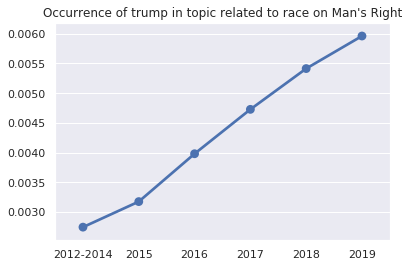

In [161]:
words_prob = dict_topic(MR_model, 0)
word = 'trump'
plt.title(f"Occurrence of {word} in topic related to race on Man's Right")
sns.pointplot(years, words_prob[word]);

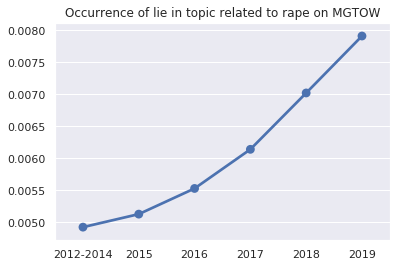

In [162]:
words_prob = dict_topic(MGTOW_model, 2)
word = "lie"
plt.title(f"Occurrence of {word} in topic related to rape on MGTOW")
sns.pointplot(years, words_prob[word]);